#Q1 What is Logistic Regression, and how does it differ from Linear Regression?



**1. Logistic Regression:**
- **Purpose**: Logistic regression is used for **binary classification**, where the goal is to predict a binary outcome (e.g., yes/no, 0/1, true/false).

- **Output**: The output is a probability that the target variable belongs to a particular class, which is then mapped to a binary value (0 or 1). The probability is calculated using the **logistic function (sigmoid)**, which ensures that the output lies between 0 and 1.
  - Formula:  $P(y = 1 | X) = \frac{1}{1 + e^{-(b_0 + b_1X)}}$
- **Nature of the Model**: It's based on the **logistic function**, which transforms the linear combination of input features into a probability.
- **Use Case**: It’s primarily used in cases where the outcome is categorical, especially when the categories are mutually exclusive (e.g., spam vs. not spam).

**2. Linear Regression:**
- **Purpose**: Linear regression is used for **predicting continuous values**. It models the relationship between the dependent variable and one or more independent variables.
- **Output**: The output is a **real number**. The model estimates the value of the target variable by a linear combination of input features.
  - Formula: $Y = b_0 + b_1X_1 + b_2X_2 + ... + b_nX_n$
- **Nature of the Model**: It’s based on fitting a **linear equation** to the data.

- **Use Case**: It’s used in cases where the outcome is continuous (e.g., predicting house prices, temperatures, etc.).




#Q2 What is the mathematical equation of Logistic Regression?

The mathematical equation of **Logistic Regression** is:

### **1. Linear Model:**
First, compute the linear relationship:

$ z = b_0 + b_1 x_1 + b_2 x_2 + \cdots + b_n x_n $

where:  
- $ z $ = linear combination of input features  
- $ b_0 $ = intercept (bias)  
- $ b_i $ = coefficients (weights)  
- $ x_i $ = input features  

### **2. Sigmoid Function:**
Apply the **sigmoid function** to convert the linear output into a probability:

$ P(y = 1 \mid x) = \frac{1}{1 + e^{-z}} $

Thus, the complete logistic regression equation is:

$ P(y = 1 \mid x) = \frac{1}{1 + e^{-(b_0 + b_1 x_1 + b_2 x_2 + \cdots + b_n x_n)}} $

where the output is a probability between **0** and **1**.

### **Interpretation:**  
- If $ P(y = 1 \mid x) \geq 0.5 $ → Predict class **1**  
- If $ P(y = 1 \mid x) < 0.5 $ → Predict class **0**  



#Q3 Why do we use the Sigmoid function in Logistic Regression?


We use the **sigmoid function** in **Logistic Regression** because it maps any real-valued input to a value between **0 and 1**, which makes it suitable for modeling **probabilities**.

### **Reasons for using the Sigmoid function:**
1. **Probability Interpretation:**  
   Logistic regression predicts the probability that a given input belongs to a particular class (e.g., 0 or 1). The sigmoid function ensures that the output value is between 0 and 1, which aligns perfectly with the definition of probability:

   $ \sigma(z) = \frac{1}{1 + e^{-z}} $

2. **Non-linearity:**  
   The sigmoid function introduces **non-linearity** into the model, which allows logistic regression to handle complex relationships between input variables and output probabilities.

3. **Smooth Gradient for Optimization:**  
   - The sigmoid function is **differentiable** and has a smooth gradient, which makes it easier to optimize using methods like **gradient descent**.  
   - The gradient of the sigmoid function is:

   $ \sigma'(z) = \sigma(z)(1 - \sigma(z)) $

   This ensures that the gradient does not vanish completely, allowing the model to learn effectively.

4. **Thresholding for Classification:**  
   The sigmoid function outputs a probability between 0 and 1, which allows for easy thresholding at **0.5** to make a binary classification decision:

   $ \hat{y} =
   \begin{cases}
   1, & \text{if } \sigma(z) \geq 0.5 \\
   0, & \text{if } \sigma(z) < 0.5
   \end{cases} $

5. **Link to Log-Loss (Cross-Entropy Loss):**  
   Logistic regression uses the sigmoid function because it pairs naturally with the **log-loss** (or **cross-entropy loss**) function, which measures the difference between predicted probabilities and actual labels.  


#Q4 What is the cost function of Logistic Regression?


The **cost function** (also known as the **loss function**) of **Logistic Regression** is used to quantify how well the model's predictions match the actual labels. In logistic regression, the cost function is typically based on **log-likelihood** and is called the **cross-entropy loss** or **logistic loss**. This cost function is designed to penalize the model more heavily for making incorrect predictions with high confidence.

### The Logistic Regression Cost Function (Cross-Entropy Loss)

Given the binary classification problem, the cost function for **Logistic Regression** is defined as:

$
J(\mathbf{w}, b) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\mathbf{w}, b}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\mathbf{w}, b}(x^{(i)})) \right]
$

Where:
- $ J(\mathbf{w}, b) $ is the cost function (or loss function),
- $ m $ is the number of training examples,

- $ y^{(i)} $ is the actual label of the $ i $-th training example (0 or 1),
- $ x^{(i)} $ is the input features of the $ i $-th training example,
- $ h_{\mathbf{w}, b}(x^{(i)}) $ is the predicted probability (model output) for the $ i $-th example, given by the **sigmoid function**:

$
h_{\mathbf{w}, b}(x^{(i)}) = \sigma(\mathbf{w}^T x^{(i)} + b) = \frac{1}{1 + e^{-(\mathbf{w}^T x^{(i)} + b)}}
$

### Breaking Down the Cost Function:

1. **For Correct Predictions**:
   - When the true label $ y^{(i)} = 1 $, the cost function includes $ \log(h_{\mathbf{w}, b}(x^{(i)})) $, which penalizes the model based on how close $ h_{\mathbf{w}, b}(x^{(i)}) $ is to 1.

   - When the true label $ y^{(i)} = 0 $, the cost function includes $ \log(1 - h_{\mathbf{w}, b}(x^{(i)})) $, which penalizes the model based on how close $ h_{\mathbf{w}, b}(x^{(i)}) $ is to 0.

2. **For Incorrect Predictions**:
   - If the model is highly confident in the wrong prediction (e.g., $ h_{\mathbf{w}, b}(x^{(i)}) $ is close to 1 when $ y^{(i)} = 0 $, or close to 0 when $ y^{(i)} = 1 $), the logarithmic terms $ \log(h_{\mathbf{w}, b}(x^{(i)})) $ or $ \log(1 - h_{\mathbf{w}, b}(x^{(i)})) $ will result in a large penalty.

3. **Averaging the Cost**:
   - The cost for all training examples is averaged by dividing by $ m $, the number of training examples, to prevent the cost from becoming too large as the number of examples increases.

### Why This Cost Function?

- **Probabilistic Interpretation**: The cost function is based on the **log-likelihood** of the logistic regression model, treating the output as a probability. The cost penalizes the model more heavily for confident but incorrect predictions.

- **Convexity**: The cost function is **convex** with respect to the model parameters, meaning there is only one global minimum, making it suitable for optimization via methods like **Gradient Descent**.
- **Differentiability**: The cross-entropy cost function is differentiable, which allows efficient optimization during training (using techniques like gradient descent).




#Q5 What is Regularization in Logistic Regression? Why is it needed?



**Regularization** in **Logistic Regression** is a technique used to prevent **overfitting**, which occurs when the model becomes too complex and fits the noise or random fluctuations in the training data rather than the underlying trend. Regularization helps improve the generalization ability of the model, making it more likely to perform well on unseen data (test set).

### Why is Regularization Needed?

In the context of **Logistic Regression**, regularization is important for several reasons:

1. **Prevent Overfitting**:
   - When a model has too many features or overly large weights, it may fit the training data extremely well (low training error) but fail to generalize to new, unseen data (high test error). Regularization penalizes large weights, which helps in reducing the complexity of the model.
   
2. **Simplify the Model**:
   - Regularization encourages simpler models with smaller coefficient values. This often leads to better performance on unseen data since simpler models tend to generalize better than complex ones.

3. **Improving Interpretability**:
   - Regularization can help in identifying the most important features by shrinking the less important ones toward zero, making the model easier to interpret.

4. **Handling Multicollinearity**:
   - In situations where there is multicollinearity (high correlation between input features), regularization can help by shrinking coefficients of correlated features, reducing their impact and improving model stability.

### Types of Regularization in Logistic Regression

There are two main types of regularization commonly used in **Logistic Regression**: **L1 Regularization** and **L2 Regularization**.

#### 1. **L2 Regularization (Ridge Regularization)**

L2 regularization adds a penalty equal to the **sum of the squares of the coefficients** to the cost function. The objective function with L2 regularization becomes:

$
J(\mathbf{w}, b) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\mathbf{w}, b}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\mathbf{w}, b}(x^{(i)})) \right] + \lambda \sum_{j=1}^{n} w_j^2
$

Where:
- $ \lambda $ is the **regularization parameter** (also called **hyperparameter**), which controls the strength of the regularization (larger $ \lambda $ means more regularization).
- $ w_j $ represents the weights associated with the input features.
  
**Effect**:
- L2 regularization penalizes large weights, but it does not force any of them to become exactly zero. Instead, it encourages all weights to be smaller, leading to a more balanced and less complex model.

#### 2. **L1 Regularization (Lasso Regularization)**

L1 regularization adds a penalty equal to the **sum of the absolute values of the coefficients** to the cost function. The objective function with L1 regularization becomes:

$
J(\mathbf{w}, b) = - \frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\mathbf{w}, b}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\mathbf{w}, b}(x^{(i)})) \right] + \lambda \sum_{j=1}^{n} |w_j|
$

Where:
- $ \lambda $ is the regularization parameter, controlling the amount of regularization.
  
**Effect**:
- L1 regularization has the property of driving some coefficients exactly to zero, effectively **selecting a subset of features**. This can lead to sparse models (with fewer non-zero weights) and is useful for **feature selection**.

### How Does Regularization Work?

1. **Penalty Term**:
   - In both L1 and L2 regularization, a penalty term is added to the cost function. This term discourages the coefficients from becoming too large, thus preventing overfitting.
   
2. **Strength of Regularization**:
   - The strength of the regularization is controlled by the parameter $ \lambda $. A small $ \lambda $ value means little regularization (similar to no regularization), while a large $ \lambda $ value heavily penalizes large weights.
   
   - The regularization term $ \lambda $ ensures that we don't place too much importance on any single feature, which could lead to overfitting if the model becomes too complex.

3. **Trade-Off**:
   - There is a trade-off between **bias** and **variance** when choosing the regularization strength. A higher $ \lambda $ reduces variance (overfitting) but increases bias (underfitting). Proper tuning of $ \lambda $ through techniques like **cross-validation** helps achieve the right balance.



### Why is Regularization Important in Logistic Regression?

1. **Prevents Overfitting**: By penalizing large weights, regularization prevents the model from fitting noise in the data, leading to better generalization to unseen data.
   
2. **Improves Generalization**: A regularized model will typically perform better on new, unseen data because it is less complex and avoids overfitting the training data.

3. **Feature Selection (L1)**: L1 regularization can automatically perform feature selection by shrinking some coefficients to zero, which can be useful in cases with many features, potentially improving model interpretability and reducing computation time.

4. **Control Model Complexity**: Regularization helps in controlling the complexity of the logistic regression model, ensuring that it doesn't become too complicated or sensitive to minor variations in the training data.




#Q6 Explain the difference between Lasso, Ridge, and Elastic Net regression.


**Lasso**, **Ridge**, and **Elastic Net** regression are all regularization techniques used in **linear regression** (and can also be applied to **logistic regression**) to prevent overfitting by penalizing large coefficients. The key difference between these techniques lies in the **type of regularization** used and how they affect the model's coefficients.

Here's a breakdown of the differences:

### 1. **Ridge Regression (L2 Regularization)**

**Ridge regression** adds a penalty to the cost function equal to the **sum of the squares of the coefficients**. This is known as **L2 regularization**.

#### Cost Function:
\$
J(\mathbf{w}) = \sum_{i=1}^{m} \left[ (y^{(i)} - \hat{y}^{(i)})^2 \right] + \lambda \sum_{j=1}^{n} w_j^2
\$

Where:
- $ \hat{y}^{(i)} $ is the predicted value for the $i$-th observation,
- $ w_j $ are the coefficients of the model,
- $ \lambda $ is the regularization parameter (controls the strength of regularization).

#### Characteristics:
- Ridge regression **penalizes large coefficients** but does not eliminate them entirely. It **shrinks** the coefficients toward zero but **keeps them non-zero**.

- It is useful when you have many features, and you believe all of them contribute in some way to the model, but you want to prevent any single feature from dominating.
  
#### Use Case:
- Ridge regression is preferred when there is **multicollinearity** (when features are highly correlated with each other) because it helps stabilize the solution by reducing the impact of highly correlated features.



### 2. **Lasso Regression (L1 Regularization)**

**Lasso regression** adds a penalty to the cost function equal to the **sum of the absolute values of the coefficients**. This is known as **L1 regularization**.

#### Cost Function:

\$
J(\mathbf{w}) = \sum_{i=1}^{m} \left[ (y^{(i)} - \hat{y}^{(i)})^2 \right] + \lambda \sum_{j=1}^{n} |w_j|
\$


Where:
- $ \hat{y}^{(i)} $ is the predicted value for the $i$-th observation,
- $ w_j $ are the coefficients of the model,
- $ \lambda $ is the regularization parameter.

#### Characteristics:
- Lasso regression **penalizes large coefficients** and **forces some coefficients to become exactly zero**. This means that Lasso is capable of performing **feature selection**, automatically eliminating unimportant features.

- It is useful when you have **a large number of features** and suspect that only a subset of them are truly relevant. Lasso helps in identifying which features are important by setting others to zero.
  
#### Use Case:
- Lasso regression is preferred when you want to **automatically select a subset of features** from a larger set, especially when there are many irrelevant or redundant features.



### 3. **Elastic Net Regression**

**Elastic Net** regression combines both **L1 (Lasso)** and **L2 (Ridge)** regularization. It is useful when there are **multiple correlated features**, as it can behave like **Ridge** when features are highly correlated and like **Lasso** when features are not.

#### Cost Function:

\$
J(\mathbf{w}) = \sum_{i=1}^{m} \left[ (y^{(i)} - \hat{y}^{(i)})^2 \right] + \lambda_1 \sum_{j=1}^{n} |w_j| + \lambda_2 \sum_{j=1}^{n} w_j^2
\$


Where:
- $ \lambda_1 $ is the regularization parameter for L1 (Lasso),
- $ \lambda_2 $ is the regularization parameter for L2 (Ridge),
- $ w_j $ are the coefficients of the model.

#### Characteristics:
- Elastic Net allows you to tune both L1 and L2 penalties via two hyperparameters, $ \lambda_1 $ and $ \lambda_2 $.

- Elastic Net is especially useful when there are **many correlated features** in the dataset. While Lasso might randomly select one feature from a group of correlated features, Elastic Net can select multiple correlated features and shrink them together.
- Elastic Net is often preferred when you have **high-dimensional data** with a mix of **relevant** and **irrelevant** features and you believe that some correlations exist between the features.

#### Use Case:
- Elastic Net is a good choice when you have **a large number of correlated predictors** (features) and you want to combine the advantages of both **feature selection (Lasso)** and **shrinkage (Ridge)**.





#Q7 When should we use Elastic Net instead of Lasso or Ridge?

We should use **Elastic Net** instead of **Lasso** or **Ridge** when:

1. **High Multicollinearity**  
   - If the predictors (independent variables) are highly correlated with each other, Elastic Net performs better than Lasso because Lasso tends to select only one of the correlated variables and ignore the others, whereas Elastic Net can handle grouped or correlated features more effectively by allowing them to be selected together.

2. **Combination of L1 and L2 Regularization Needed**  
   - Elastic Net combines both **L1 regularization** (used in Lasso) and **L2 regularization** (used in Ridge).  
     - L1 regularization (Lasso) promotes sparsity (selects only important features).  
     - L2 regularization (Ridge) shrinks the coefficients of correlated features towards each other.  
   - Elastic Net provides a balance between feature selection (L1) and coefficient shrinkage (L2), which can improve model performance when neither Ridge nor Lasso alone gives optimal results.

3. **Lasso Instability in High-Dimensional Data**  
   - In cases with **more features than observations** (high-dimensional data), Lasso tends to select only a small subset of features, leading to instability and increased variance.  
   - Elastic Net helps by stabilizing the solution using the Ridge penalty component.

4. **When Pure Lasso or Ridge Is Not Performing Well**  
   - If Lasso is too aggressive in shrinking coefficients to zero or Ridge is too weak in performing feature selection, Elastic Net can provide a middle ground by tuning the balance between L1 and L2 using the mixing parameter **α**.



#Q8 What is the impact of the regularization parameter $(λ)$ in Logistic Regression?


In **Logistic Regression**, the regularization parameter $\( \lambda \$) (or **C** in some implementations like `scikit-learn`) controls the strength of the penalty applied to the model’s coefficients, which impacts the model's complexity and performance.


###  **Impact of the Regularization Parameter $\( \lambda \$):**
1. **High λ (Strong Regularization)**  
   - Increases the strength of the penalty, forcing the coefficients to shrink toward zero.  
   - Reduces model complexity → Prevents overfitting.  
   - If λ is too large, it may lead to **underfitting** (high bias, low variance).  

2. **Low λ (Weak Regularization)**  
   - Reduces the effect of the penalty, allowing the model to fit the data more closely.  
   - Increases model complexity → Prevents underfitting.  
   - If λ is too small, it may lead to **overfitting** (low bias, high variance).  

3. **λ = 0 (No Regularization)**  
   - The model reduces to standard Logistic Regression without any penalty.  
   - Prone to overfitting, especially in high-dimensional data.  



###  **Effect of Regularization Type:**
- **L1 Regularization (Lasso):** Encourages sparsity by driving some coefficients to **exactly zero** → Useful for feature selection.

- **L2 Regularization (Ridge):** Shrinks coefficients toward zero but **does not make them exactly zero** → Helps with multicollinearity.  
- **Elastic Net:** Combines both L1 and L2 to balance between sparsity and shrinkage.  


#Q9 What are the key assumptions of Logistic Regression?


Logistic regression is a widely used statistical model for binary classification. Here are the key assumptions of logistic regression:

1. **Binary Outcome**: Logistic regression assumes that the dependent variable (target) is binary, meaning it has two possible outcomes (e.g., 0 or 1, yes or no, true or false).

2. **Linear Relationship between Predictors and Log-Odds**: It assumes that there is a linear relationship between the independent variables (predictors) and the log-odds of the dependent variable. This means that the log-odds of the event occurring is a linear combination of the predictors.

3. **Independence of Observations**: Logistic regression assumes that the observations are independent of one another, meaning the outcome for one observation does not influence the outcome for another.

4. **No or Little Multicollinearity**: Logistic regression assumes that the predictor variables are not highly correlated with each other. High multicollinearity (i.e., high correlation between predictors) can lead to unreliable estimates of the model coefficients.

5. **Sufficient Sample Size**: Logistic regression assumes a large enough sample size to provide reliable estimates of the model parameters. A small sample size can lead to overfitting or incorrect inferences.

6. **Homoscedasticity (for some models)**: While homoscedasticity (constant variance of residuals) is not a strict assumption in logistic regression, it is still preferable for the model to behave similarly across different levels of the predictors.

7. **No Strong Outliers**: Logistic regression assumes that there are no extreme outliers that disproportionately influence the model’s predictions. Outliers can distort the results of the regression.

8. **Additivity of Effects**: Logistic regression assumes that the effect of each predictor on the outcome is additive, meaning the impact of each predictor variable is independent of the values of other predictors.

These assumptions help ensure that logistic regression produces valid and reliable estimates. However, deviations from these assumptions may impact the accuracy or reliability of the model, requiring potential adjustments or alternative methods.


#Q10 What are some alternatives to Logistic Regression for classification tasks?


There are several alternative algorithms to **Logistic Regression** for classification tasks. Here are some common ones:

### 1. **Decision Trees**
   - **Overview**: Decision trees are a non-linear model that splits the data into subsets based on feature values. Each split is made to maximize information gain or minimize impurity (e.g., Gini index or entropy).
   - **Advantages**: Easy to interpret and visualize, can handle both numerical and categorical data, no need for feature scaling.
   - **Disadvantages**: Prone to overfitting, especially with deep trees. Can be unstable if small changes in data lead to large changes in the tree structure.

### 2. **Random Forest**
   - **Overview**: A Random Forest is an ensemble method that builds multiple decision trees and combines their predictions (via majority voting for classification). It mitigates the overfitting issue of decision trees by averaging multiple models.
   - **Advantages**: Robust to overfitting, handles large datasets well, performs well with both numerical and categorical data.
   - **Disadvantages**: Less interpretable compared to a single decision tree, can be computationally expensive.

### 3. **Support Vector Machines (SVM)**
   - **Overview**: SVM finds the optimal hyperplane that separates the data into different classes. It can handle both linear and non-linear classification problems using the **kernel trick**.
   - **Advantages**: Works well for high-dimensional data and is effective when there is a clear margin of separation between classes.
   - **Disadvantages**: Can be computationally expensive, especially with large datasets. Choosing the right kernel and regularization parameter can be challenging.

### 4. **K-Nearest Neighbors (KNN)**
   - **Overview**: KNN is a simple, instance-based learning algorithm that classifies new data points based on the majority class of its nearest neighbors in the feature space.
   - **Advantages**: Simple to understand and implement, no training phase, works well with smaller datasets.
   - **Disadvantages**: Computationally expensive during prediction (as it needs to compute distances to all points), sensitive to irrelevant features and the curse of dimensionality.

### 5. **Naive Bayes**
   - **Overview**: Naive Bayes is a probabilistic classifier based on Bayes' Theorem. It assumes that the features are conditionally independent, given the class label.
   - **Advantages**: Simple, fast, and works well with high-dimensional data (e.g., text classification), often performs well even with smaller datasets.
   - **Disadvantages**: The independence assumption is often unrealistic, which can degrade performance on some types of data.


### 6. **Neural Networks (Deep Learning)**
   - **Overview**: Neural networks consist of layers of interconnected nodes (neurons) that transform the input data through non-linear activations. Deep learning models are particularly useful for complex data like images, text, or audio.
   - **Advantages**: Highly flexible and capable of modeling complex, non-linear relationships. Can handle large and high-dimensional datasets.
   - **Disadvantages**: Requires large datasets to train effectively, computationally expensive, and difficult to interpret.


### 7. **Logistic Regression with Regularization (Ridge, Lasso)**
   - **Overview**: Regularized versions of logistic regression (Ridge for L2 regularization, Lasso for L1 regularization) help prevent overfitting by penalizing large coefficients.
   - **Advantages**: Less prone to overfitting, good for high-dimensional data.
   - **Disadvantages**: Still assumes a linear relationship between features and log-odds, so it might not work well if the data is highly non-linear.



Each of these algorithms has its strengths and weaknesses, and the choice of which one to use depends on the nature of your data, the problem you're solving, and your computational resources.



#Q11 What are Classification Evaluation Metrics?



**Classification evaluation metrics** are tools used to assess the performance of a classification model. These metrics help us understand how well the model is predicting the target classes. Depending on the nature of the problem (binary or multi-class classification), the metrics can differ. Here are the key classification evaluation metrics:

### 1. **Accuracy**
   - **Definition**: The ratio of correctly predicted instances to the total instances.
   - **Formula**:
     \$
     Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
     \$

     where:
     - **TP** = True Positives
     - **TN** = True Negatives
     - **FP** = False Positives
     - **FN** = False Negatives

   - **Usefulness**: Good for balanced datasets, but not ideal for imbalanced datasets.

### 2. **Precision**
   - **Definition**: The ratio of true positive predictions to the total predicted positives (i.e., how many of the predicted positive instances were actually positive).
   - **Formula**:
     \$
     Precision = \frac{TP}{TP + FP}
     \$
   - **Usefulness**: High precision indicates that the classifier is good at avoiding false positives.

### 3. **Recall (Sensitivity or True Positive Rate)**
   - **Definition**: The ratio of true positive predictions to the total actual positives (i.e., how many of the actual positive instances were correctly identified).
   - **Formula**:
     \$
     Recall = \frac{TP}{TP + FN}
     \$
   - **Usefulness**: High recall indicates that the classifier is good at identifying most of the positive instances.

### 4. **F1-Score**
   - **Definition**: The harmonic mean of precision and recall, providing a balance between the two.
   - **Formula**:
     \$
     F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
     \$
   - **Usefulness**: Useful when you want to balance precision and recall, especially in imbalanced datasets.

### 5. **Specificity (True Negative Rate)**
   - **Definition**: The ratio of true negative predictions to the total actual negatives (i.e., how many of the actual negative instances were correctly identified).
   - **Formula**:
     \$
     Specificity = \frac{TN}{TN + FP}
     \$
   - **Usefulness**: Indicates how well the model avoids false positives.

### 6. **ROC-AUC (Receiver Operating Characteristic - Area Under Curve)**
   - **Definition**: The ROC curve is a plot of the true positive rate (recall) versus the false positive rate (1 - specificity). AUC is the area under this curve, providing an overall assessment of model performance.
   - **Usefulness**: AUC ranges from 0 to 1, with a value closer to 1 indicating a better model. It is particularly useful when dealing with imbalanced datasets.

### 7. **Confusion Matrix**
   - **Definition**: A matrix that shows the actual vs. predicted classifications, providing insight into the types of errors the model makes (false positives, false negatives, true positives, and true negatives).
   - **Usefulness**: It helps visualize the performance and the types of errors made.

### 8. **Log Loss (Logarithmic Loss)**
   - **Definition**: A performance metric for evaluating classification models, especially in probabilistic classifications. It penalizes incorrect classifications with higher confidence.
   - **Formula**:
     \$
     Log \, Loss = -\frac{1}{N} \sum_{i=1}^N [y_i \log(p_i) + (1 - y_i) \log(1 - p_i)]
     \$

     where:
     - $y_i$ is the true label (0 or 1),
     - $p_i$ is the predicted probability of class 1.

   - **Usefulness**: Ideal for probabilistic classifiers, and lower log loss is better.

### 9. **Matthews Correlation Coefficient (MCC)**
   - **Definition**: A measure of the quality of binary classifications. It accounts for true and false positives and negatives.
   - **Formula**:
     \$
     MCC = \frac{TP \times TN - FP \times FN}{\sqrt{(TP + FP)(TP + FN)(TN + FP)(TN + FN)}}
     \$

   - **Usefulness**: A balanced metric that works well even for imbalanced datasets. Ranges from -1 (worst) to 1 (best).






#Q12 How does class imbalance affect Logistic Regression?


Class imbalance can significantly affect Logistic Regression, and here's how:

### 1. **Bias Toward Majority Class**
   Logistic Regression models the probability of an outcome, and if one class is much more frequent than the other (i.e., class imbalance), the model might predict the majority class almost all the time. This results in high accuracy for the majority class but poor performance on the minority class. For example, if 95% of your data points belong to Class 0 and 5% to Class 1, the model may predict Class 0 most of the time, leading to a high accuracy but poor recall and precision for Class 1.

### 2. **Skewed Decision Boundary**
   The decision boundary learned by Logistic Regression is based on the likelihood ratio between classes. With imbalanced data, the model might shift the decision boundary toward the majority class, making it harder for the minority class to be correctly classified. In extreme cases, the model might fail to identify the minority class entirely.

### 3. **Metrics Misleading**
   With imbalanced classes, accuracy becomes less useful because it can be misleading. Even though the model might show high accuracy by simply predicting the majority class, it might be underperforming in terms of precision, recall, and F1-score for the minority class. In these situations, metrics like **Precision-Recall AUC** or **F1-score** are more informative.

### 4. **Loss Function Impact**
   Logistic Regression minimizes a **log-loss** function, which computes the error based on predicted probabilities. In imbalanced datasets, the loss is more influenced by the majority class, because the model is likely predicting it much more often. This leads to poor performance for the minority class as the model’s parameters are not updated enough to improve the classification of the minority class.





#Q13 What is Hyperparameter Tuning in Logistic Regression?


**Hyperparameter tuning** in logistic regression refers to the process of selecting the optimal hyperparameters (parameters set before training a model) to improve the model's performance. These hyperparameters control how the logistic regression model is trained and can significantly affect its accuracy, efficiency, and generalization to new data.

In logistic regression, some common hyperparameters to tune include:

1. **Regularization Strength (C)**:
   - Logistic regression often uses regularization to prevent overfitting. The `C` parameter controls the regularization strength.
   - **L2 regularization** is the most commonly used for logistic regression, and `C` is the inverse of the regularization strength.
     - A smaller value of `C` implies stronger regularization (which reduces overfitting).
     - A larger value of `C` implies weaker regularization (which might lead to overfitting).
   - The goal is to find a balance between underfitting and overfitting.

2. **Solver**:
   - The solver determines the algorithm used for optimizing the model's coefficients. Common solvers include:
     - **'liblinear'**: Uses a coordinate descent algorithm, suitable for small datasets and for problems with L1 regularization.
     - **'lbfgs'**, **'newton-cg'**, and **'saga'**: These are other solvers often used with larger datasets or when L2 regularization is preferred.

3. **Max Iterations** (`max_iter`):
   - This hyperparameter specifies the maximum number of iterations for the optimization algorithm to converge.
   - If the solver doesn't converge within the specified number of iterations, increasing this value might help.

4. **Tolerance** (`tol`):
   - This hyperparameter determines the tolerance level for stopping the optimization. A lower tolerance will result in more precise solutions but might require more iterations.

5. **Penalty**:
   - It specifies the type of regularization. For logistic regression, common choices are:
     - **'l1'**: Lasso regularization that can lead to sparse models (feature selection).
     - **'l2'**: Ridge regularization that adds a penalty on the magnitude of coefficients.
     - **'elasticnet'**: A mix of L1 and L2 regularization.
   - Regularization helps prevent overfitting by reducing the complexity of the model.

### Why Tune Hyperparameters?

Tuning hyperparameters allows the model to perform better by finding the configuration that leads to the best performance on validation data. Hyperparameter tuning is essential because:

- It helps optimize model performance.
- It can prevent overfitting or underfitting.
- It ensures that the model generalizes well to new data.

### Techniques for Hyperparameter Tuning:
1. **Grid Search**:
   - An exhaustive search over a predefined set of hyperparameters. It tries every combination of hyperparameters within the specified ranges.
   
2. **Random Search**:
   - Randomly selects combinations of hyperparameters to try, which can be more efficient than grid search, especially with a large hyperparameter space.

3. **Bayesian Optimization**:
   - A more advanced technique that uses probability models to predict the most promising hyperparameters to try next.

4. **Cross-Validation**:
   - Cross-validation techniques (like k-fold cross-validation) are often used with hyperparameter tuning to get a more reliable estimate of model performance.

### Example of Tuning Hyperparameters for Logistic Regression:

             
             from sklearn.model_selection import GridSearchCV
             from sklearn.linear_model import LogisticRegression
             
             # Define model
             model = LogisticRegression()
             
             # Define hyperparameters to tune
             param_grid = {
                 'C': [0.01, 0.1, 1, 10, 100],
                 'solver': ['liblinear', 'lbfgs', 'saga'],
                 'max_iter': [100, 200, 300],
                 'penalty': ['l1', 'l2']
             }
             
             # Perform grid search with cross-validation
             grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
             grid_search.fit(X_train, y_train)
             
             # Best parameters
             print(grid_search.best_params_)
             

In this example, the `GridSearchCV` is used to perform hyperparameter tuning by testing different combinations of values for `C`, `solver`, `max_iter`, and `penalty`.

By adjusting these hyperparameters, logistic regression can become more effective in classifying data accurately.

























#Q14 What are different solvers in Logistic Regression? Which one should be used?


In **Logistic Regression**, the choice of **solver** refers to the algorithm used to optimize the model’s parameters (coefficients) by minimizing the cost function (typically, the log-loss or binary cross-entropy for binary classification). Several solvers are available in the popular Python library `scikit-learn`, each having different strengths and weaknesses. Here are the common solvers:

### 1. **‘liblinear’**
   - **Algorithm**: Uses **coordinate descent** (a variant of gradient descent).
   - **Pros**:
     - Works well for small to medium datasets.
     - Suitable for problems with a **small number of features** (e.g., less than 10,000 features).
     - Handles **L1 regularization** (Lasso) well.
   - **Cons**:
     - May not scale well with large datasets.
   - **Use Case**: When you have a small to medium-sized dataset and want to perform **L1 regularization** or need simplicity.

### 2. **‘newton-cg’**
   - **Algorithm**: Uses **Newton’s method**, which approximates the Hessian matrix for second-order optimization.
   - **Pros**:
     - More efficient for **large datasets** compared to `liblinear`.
     - Works well with **L2 regularization** (Ridge).
   - **Cons**:
     - Can be slower for very small datasets.
   - **Use Case**: When you have a medium to large dataset and want **L2 regularization**.

### 3. **‘lbfgs’**
   - **Algorithm**: A variation of **Broyden–Fletcher–Goldfarb–Shanno (BFGS)**, a quasi-Newton method.
   - **Pros**:
     - Generally performs well for **large datasets**.
     - Suitable for both **L1 and L2 regularization**.
   - **Cons**:
     - Can be computationally expensive for very large datasets with many features.
   - **Use Case**: Ideal for large datasets with **both regularization types**.

### 4. **‘saga’**
   - **Algorithm**: Similar to **‘lbfgs’**, but it’s a variant of **Stochastic Gradient Descent (SGD)** and more efficient for sparse data.
   - **Pros**:
     - Works well with **very large datasets**.
     - Handles both **L1 and L2 regularization** (even **elastic net**).
     - Efficient for **sparse data**.
   - **Cons**:
     - Can be slower than `liblinear` for smaller datasets.
   - **Use Case**: Best for **very large datasets** or **sparse data**.

### 5. **‘gd’ (Gradient Descent)**
   - **Algorithm**: A first-order optimization technique, using iterative updates.
   - **Pros**:
     - Customizable learning rate, useful for experimenting.
   - **Cons**:
     - Might require careful tuning of learning rates and convergence criteria.
   - **Use Case**: When you want more control over the optimization process, but it’s less common than the others.



### **Which solver should you use?**

- **For small datasets**: Use **‘liblinear’** if you need to use L1 regularization, or if you want a straightforward solver for a small-to-medium-sized dataset.
- **For medium to large datasets**: Use **‘lbfgs’** or **‘newton-cg’** for better performance with L2 regularization, as they are faster and more scalable.
- **For very large or sparse datasets**: Use **‘saga’**, especially if you are working with a large dataset and need to handle sparse data or want to use L1 regularization.





























#Q15 How is Logistic Regression extended for multiclass classification?


Logistic Regression is inherently a binary classifier, meaning it predicts the probability of a sample belonging to one of two classes. However, it can be extended to handle multiclass classification problems, where there are more than two possible classes, through two primary techniques:

### 1. **One-vs-Rest (OvR) or One-vs-All (OvA)**
In this approach, for a classification problem with $K$ classes, $K$ separate binary classifiers are trained, each one corresponding to one of the classes. For each classifier:

- It learns to distinguish one class from all the others (thus, the "rest" or "all" of the classes).
- For class $k$, the classifier will predict if a sample belongs to class $k$ (positive class) or not (negative class).

During prediction:
- Each classifier computes the probability of the sample belonging to its class.
- The class with the highest probability across all classifiers is selected as the final predicted class.

### Example:
If we have three classes: $C_1$, $C_2$, and $C_3$, we train three classifiers:
- Classifier 1: Classifies $C_1$ vs. $C_2 \cup C_3$
- Classifier 2: Classifies $C_2$ vs. $C_1 \cup C_3$
- Classifier 3: Classifies $C_3$ vs. $C_1 \cup C_2$

The model then selects the class with the highest probability.

### 2. **Softmax Regression (Multinomial Logistic Regression)**
This method directly generalizes logistic regression to multiclass classification by using the **softmax function**. Instead of using a single logistic function (sigmoid), we use the softmax function to predict a probability distribution over $K$ classes.

In multinomial logistic regression, the model calculates the probability of each class $k$ given the input features $\mathbf{x}$:

$$
P(y = k | \mathbf{x}) = \frac{e^{\mathbf{w}_k^T \mathbf{x}}}{\sum_{j=1}^{K} e^{\mathbf{w}_j^T \mathbf{x}}}
$$

Where:
- $\mathbf{w}_k$ is the weight vector for class $k$.
- The denominator sums the exponential values for all classes to ensure the output probabilities sum to 1.

### Steps in Softmax Regression:
- **Training**: The model learns $K$ weight vectors, one for each class, by minimizing the cross-entropy loss.
- **Prediction**: The class with the highest probability $P(y = k | \mathbf{x})$ is chosen as the predicted class.

### Comparison:
- **One-vs-Rest**: More straightforward to implement, but it treats each class independently and might lead to less optimal classification boundaries since it doesn't account for relationships between the classes.
- **Softmax Regression**: More elegant, as it models the relationship between all classes together. The model is trained jointly, and the decision boundaries are better suited for handling multiple classes.











#Q16 What are the advantages and disadvantages of Logistic Regression?



1. **Simple and interpretable:**
   - Logistic regression is easy to understand and interpret. The output is probabilistic, meaning you get a predicted probability of an outcome, making it suitable for binary classification tasks (e.g., spam vs. not spam).

2. **Efficiency:**
   - It’s computationally efficient, making it suitable for large datasets. The training time is generally faster compared to more complex models like decision trees or neural networks.

3. **Probabilistic output:**
   - The model provides probabilities, which can be useful when you need to assess the confidence level of predictions.

4. **Works well with linearly separable data:**
   - If the data is linearly separable, logistic regression tends to perform very well.

5. **Less prone to overfitting:**
   - Logistic regression with regularization (e.g., L2 regularization) helps prevent overfitting, especially in high-dimensional datasets.

6. **Good baseline model:**
   - It’s often used as a baseline for binary classification tasks. It’s simple enough to give a quick first impression of the data’s behavior.

7. **Works well with high-dimensional data (with regularization):**
   - Logistic regression can handle high-dimensional spaces, especially with regularization techniques (L1 or L2 regularization).



**Disadvantages of Logistic Regression:**

1. **Assumes linearity:**
   - Logistic regression assumes a linear relationship between the independent variables and the log-odds of the dependent variable, which may not always be true in practice. It struggles when the decision boundary is nonlinear.

2. **Sensitive to outliers:**
   - Logistic regression can be sensitive to outliers in the data. Outliers can significantly affect the model's performance and accuracy.

3. **Not suitable for complex relationships:**
   - When the relationship between features and the outcome is complex, logistic regression might not perform well compared to more complex models (like decision trees or neural networks).

4. **Requires feature engineering:**
   - Logistic regression may require careful feature selection or transformation. If the features are not carefully selected or engineered, the model may not perform well.

5. **Assumption of no multicollinearity:**
   - Logistic regression assumes that the features are not highly correlated with each other (multicollinearity). If there is high correlation among features, it may cause problems in estimating the coefficients reliably.

6. **Binary classification limitation:**
   - Logistic regression is primarily used for binary classification problems. Although there are extensions (e.g., multinomial logistic regression) for multiclass classification, it is not as straightforward to implement as other algorithms like decision trees or random forests for multiclass tasks.

7. **Not good with highly imbalanced datasets:**
   - If one class is significantly more prevalent than the other, logistic regression may be biased towards the majority class unless techniques like oversampling, undersampling, or using class weights are applied.





















#Q17 What are some use cases of Logistic Regression?


Logistic regression is a powerful statistical method widely used for binary classification tasks. Here are some common use cases:

### 1. **Spam Detection**
   - **Use case**: Identifying whether an email is spam or not.
   - **Application**: By analyzing various features (like the content of the email, sender's information, and subject line), logistic regression can classify emails as spam (1) or not spam (0).

### 2. **Medical Diagnosis**
   - **Use case**: Predicting the presence or absence of a disease.
   - **Application**: Logistic regression is used to predict whether a patient has a particular disease (e.g., cancer or diabetes) based on medical test results, age, gender, and other risk factors.

### 3. **Customer Churn Prediction**
   - **Use case**: Predicting whether a customer will leave a service or stay.
   - **Application**: In telecom, banking, or subscription services, logistic regression can help identify whether a customer is likely to cancel their subscription based on historical usage data, customer support interactions, etc.

### 4. **Credit Scoring**
   - **Use case**: Determining whether an individual is likely to default on a loan.
   - **Application**: Banks use logistic regression to predict the probability that a person will default on a loan based on features like income, credit history, loan amount, etc.

### 5. **Marketing Campaign Effectiveness**
   - **Use case**: Predicting whether a customer will respond to a marketing campaign.
   - **Application**: Logistic regression can be used to classify customers as "responders" or "non-responders" to a particular marketing offer, helping businesses tailor their marketing strategies.

### 6. **E-commerce Purchase Prediction**
   - **Use case**: Predicting whether a customer will make a purchase.
   - **Application**: E-commerce platforms use logistic regression to predict the likelihood of a customer making a purchase based on their browsing behavior, demographics, and past transactions.

### 7. **Sentiment Analysis**
   - **Use case**: Classifying text into categories like positive or negative sentiment.
   - **Application**: Logistic regression can be used in text classification tasks, such as sentiment analysis of customer reviews (positive vs. negative).

### 8. **Social Media Influence**
   - **Use case**: Predicting whether a social media post will go viral.
   - **Application**: Logistic regression can be used to predict whether a post will gain significant traction (likes, shares, comments) based on user behavior patterns and content features.

### 9. **Risk Assessment**
   - **Use case**: Identifying risk levels (high or low).
   - **Application**: Logistic regression can be used in fields like insurance or finance to assess the risk of events happening (e.g., a high or low likelihood of a vehicle being involved in an accident).

### 10. **Fraud Detection**
   - **Use case**: Identifying fraudulent activities in transactions.
   - **Application**: Logistic regression can be used to classify transactions as legitimate or fraudulent based on transaction data (e.g., transaction amount, time, location, and user profile).









#Q18 What is the difference between Softmax Regression and Logistic Regression?


Both **Softmax Regression** and **Logistic Regression** are used for classification problems, but they differ in the types of problems they are suited for and how they handle the output.

Here’s a breakdown of the key differences:

### 1. **Type of Classification:**
   - **Logistic Regression** is typically used for **binary classification**, where the output is a probability of the sample belonging to one of two classes (0 or 1).
   - **Softmax Regression** is an extension of Logistic Regression and is used for **multiclass classification**. It is used when there are more than two classes (e.g., classifying into one of several categories).

### 2. **Output:**
   - **Logistic Regression** outputs a single probability value between 0 and 1 for a binary classification problem. This probability indicates how likely the input belongs to the positive class (class 1).
     \$
     P(y=1|X) = \frac{1}{1 + e^{-(w^T X + b)}}
     \$
   - **Softmax Regression** outputs a probability distribution over multiple classes. For a multiclass problem with \(C\) classes, it computes a probability for each class, and the sum of all probabilities will equal 1.
     \$
     P(y=c|X) = \frac{e^{w_c^T X + b_c}}{\sum_{i=1}^{C} e^{w_i^T X + b_i}}
     \$
     where $\(C\$) is the number of classes, and $\(w_c, b_c\$) represent the parameters for each class.

### 3. **Number of Outputs:**
   - **Logistic Regression** has a **single output** representing the probability for the positive class.
   - **Softmax Regression** has **multiple outputs** (one for each class), each representing the probability of that particular class.

### 4. **Loss Function:**
   - **Logistic Regression** uses **binary cross-entropy loss** for binary classification.
   - **Softmax Regression** uses **categorical cross-entropy loss** for multiclass classification.

### 5. **Interpretation of Output:**
   - **Logistic Regression** outputs a probability between 0 and 1, which is typically thresholded at 0.5 to classify as either class 0 or class 1.
   - **Softmax Regression** gives a probability distribution across all classes, where the class with the highest probability is selected as the predicted class.

### 6. **Generalization:**
   - **Logistic Regression** is essentially a special case of Softmax Regression when the number of classes is 2.
   - **Softmax Regression** generalizes Logistic Regression to handle cases with more than two classes.

















#Q19 How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?



Choosing between **One-vs-Rest (OvR)** and **Softmax** for multiclass classification depends on the characteristics of the problem and the type of model you're working with. Here are some key factors to consider when deciding which approach to use:

### 1. **Model Type**
   - **Softmax** is typically used with **neural networks** and models that directly output a probability distribution over classes. The Softmax function ensures that the predicted values are mutually exclusive and sum to 1, making it ideal when you want a single, exclusive class prediction.
   - **One-vs-Rest (OvR)**, on the other hand, is commonly used with models like **logistic regression**, **SVMs**, and **random forests**. It involves training one binary classifier for each class, where the classifier predicts whether the sample belongs to that class or not, and you choose the class with the highest probability (or decision score).

### 2. **Interpretability and Decision Boundaries**
   - **Softmax**: This approach is better when you need the model to output a **probability distribution** and when the classes are **mutually exclusive** (i.e., each instance can only belong to one class). It tends to produce smoother decision boundaries between classes since the model directly optimizes for the joint probability of all classes.
   - **OvR**: This method might result in **less smooth decision boundaries**, as each classifier is independently trained, meaning the decision boundary is defined separately for each class versus the rest. It can lead to **more complex decision regions** and may be less robust when classes are imbalanced or have overlapping distributions.

### 3. **Class Imbalance**
   - **Softmax**: Can be sensitive to **class imbalance**, especially if you are using a neural network. If some classes are significantly underrepresented, the model may not learn to distinguish them well.
   - **OvR**: Can also suffer from class imbalance, but each individual binary classifier is only concerned with one class. However, if some classes are much more difficult to classify, each classifier might need extra tuning (like using class weights) to improve performance.

### 4. **Computational Considerations**
   - **Softmax**: In terms of training, Softmax is generally more **efficient** when dealing with a large number of classes, because it involves training a single classifier (e.g., a neural network) that can output probabilities for all classes simultaneously.
   - **OvR**: Requires training a separate binary classifier for each class, leading to **increased computational overhead** if the number of classes is large. For instance, if there are 10 classes, you need to train 10 separate models (or at least 10 separate decision functions).

### 5. **Model Scalability**
   - **Softmax**: Works well when the number of classes is relatively small to moderate and you can train a model that outputs class probabilities efficiently.
   - **OvR**: Can become less scalable as the number of classes increases because the number of binary classifiers grows linearly with the number of classes. For a large number of classes, this can be computationally expensive.

### 6. **Performance**
   - **Softmax**: Tends to perform better in terms of generalization for models like neural networks, as it directly models the relationships between the classes. It often provides more accurate predictions when the model has access to more data and can learn the complex dependencies between classes.
   - **OvR**: Can work well for simpler models (like SVMs or logistic regression) and might be more suitable if the model assumes independent decision boundaries for each class.

### Summary Table

| **Factor**               | **One-vs-Rest (OvR)**                          | **Softmax**                                     |
|--------------------------|------------------------------------------------|-------------------------------------------------|
| **Model Type**            | Works well with SVMs, logistic regression, etc. | Works with neural networks (e.g., softmax layer) |
| **Class Exclusivity**     | Independent classifiers for each class         | Mutually exclusive classes, one class at a time  |
| **Interpretability**      | Each classifier gives a binary prediction      | Direct probability distribution across classes  |
| **Decision Boundaries**   | Can have more complex and less smooth boundaries| Smooth, continuous decision boundaries          |
| **Class Imbalance**       | Can handle imbalance with adjustments (e.g., class weights) | Sensitive to imbalance, needs careful tuning   |
| **Computational Cost**    | Requires training many classifiers for large number of classes | More efficient, one classifier for all classes  |
| **Scalability**           | Less scalable for many classes                 | Scales better with a large number of classes    |

### When to Use Each:
- **Use Softmax**:
  - When you are working with neural networks.
  - When you need a probability distribution over the classes.
  - When classes are mutually exclusive.
  - When you want smoother decision boundaries and joint optimization across all classes.

- **Use One-vs-Rest**:
  - When using simpler models like logistic regression, SVM, or random forests.
  - When you prefer to break the problem down into simpler binary classification problems.
  - When you have a large number of classes and need to scale the model efficiently.

In practice, the choice often depends on the type of model you are using, the number of classes, and the complexity of your problem.











#Q20 How do we interpret coefficients in Logistic Regression?



In logistic regression, the coefficients represent the relationship between the predictor variables (features) and the log-odds of the outcome variable. Here's how we interpret them:

### 1. **Log-Odds Interpretation**
   - Logistic regression predicts the log-odds of an event happening. The log-odds are the logarithm of the odds (probability of event occurring / probability of event not occurring).
   - The coefficients tell us how much the log-odds of the dependent variable change for a one-unit change in the predictor variable, while holding other variables constant.

### 2. **Coefficient Interpretation (in terms of Odds)**
   - For a given coefficient $ \beta_i $ associated with a feature $ x_i $, the interpretation is as follows:
     - If $ \beta_i > 0 $: An increase in $ x_i $ will increase the odds of the event occurring.
     - If $ \beta_i < 0 $: An increase in $ x_i $ will decrease the odds of the event occurring.
     - If $ \beta_i = 0 $: The predictor $ x_i $ has no effect on the odds of the event.

### 3. **Exponentiation of Coefficients (Exp($\beta$))**
   - To interpret the coefficients in terms of odds ratios, we take the **exponent** of the coefficient $ e^{\beta_i} $. This gives the odds ratio:
     - **Odds Ratio = Exp($\beta$)**: The odds of the event happening for a one-unit increase in $ x_i $.
     - If $ e^{\beta_i} > 1 $: The odds of the event increase as $ x_i $ increases.
     - If $ e^{\beta_i} < 1 $: The odds of the event decrease as $ x_i $ increases.
     - If $ e^{\beta_i} = 1 $: There is no change in the odds of the event.

### 4. **Example Interpretation**
   Suppose we have the following logistic regression model:
   $$
   \text{log-odds} = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2
   $$
   - Let's say $ \beta_1 = 0.5 $ and $ \beta_2 = -1.2 $.
   - For a 1-unit increase in $ x_1 $, the odds of the event occurring are multiplied by $ e^{0.5} \approx 1.65 $. So, a 1-unit increase in $ x_1 $ increases the odds of the event by 65%.
   - For a 1-unit increase in $ x_2 $, the odds of the event occurring are multiplied by $ e^{-1.2} \approx 0.30 $. So, a 1-unit increase in $ x_2 $ decreases the odds of the event by 70%.

### 5. **Significance of Coefficients**
   - In addition to the magnitude, the significance (p-value) of each coefficient is important. A low p-value (usually < 0.05) indicates that the coefficient is statistically significant, meaning that the feature is likely contributing to the prediction of the outcome variable.
































In [18]:
#1 Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic Regression, and prints the model accuracy.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#loading dataset
from sklearn.datasets import load_iris
data = load_iris()

df = pd.DataFrame(data.data, columns= data.feature_names)
df['target'] = data.target

#For binary classification we only need two features  (0 and 1)

df = df[df['target'] != 2]

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Splitting into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


#Model training
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


#Printing model Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy Score :" , accuracy_score(y_test,y_pred))

Accuracy Score : 1.0


In [23]:
#2 Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1') and print the model accuracy


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#loading dataset
from sklearn.datasets import load_iris
data = load_iris()

df = pd.DataFrame(data.data, columns= data.feature_names)
df['target'] = data.target

df = df[df['target'] != 2]

x = df.iloc[:,:-1]
y = df.iloc[:,-1]


# Splitting into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)


# Model training with L1 regularization
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l1', solver = 'liblinear')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)


#Printing model Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy Score :" , accuracy_score(y_test,y_pred))


Accuracy Score : 1.0


In [31]:
#3 Write a Python program to train Logistic Regression with L2 regularization (Ridge) using LogisticRegression(penalty='l2').
#   Print model accuracy and coefficients.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.datasets import make_classification

x , y = make_classification(n_samples=1000 , n_features= 10 , n_redundant= 5, n_informative=5, n_classes= 2, random_state=1)



# Splitting into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty= 'l2' , solver='lbfgs')
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

#Printing model Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy Score :" , accuracy_score(y_test,y_pred))

# Printing the coefficients of the model
print("\nCoefficients of the model (after L2 regularization):\n")
print(clf.coef_)


Accuracy Score : 0.836

Coefficients of the model (after L2 regularization):

[[ 0.16744847 -0.62488117  0.45010096 -0.44172177  0.18914296 -0.11498123
  -0.39445326  0.00839952 -0.50251247  0.22930837]]


In [33]:
#4 Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.datasets import make_classification
x , y = make_classification(n_samples= 1000 , n_features= 10 , n_informative=5 ,n_redundant=5 , n_classes=2, random_state=1)


# Splitting into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)


from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty= 'elasticnet', solver='saga' , l1_ratio=0.5)
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)



from sklearn.metrics import accuracy_score
print("Accuracy Score :" , accuracy_score(y_test,y_pred))



Accuracy Score : 0.836


In [39]:
#5 Write a Python program to train a Logistic Regression model for multiclass classification using multi_class='ovr'.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
x , y = make_classification(n_samples=1000 , n_features=10 , n_informative=5, n_redundant=5 , n_classes=2 , random_state=1)

# Splitting into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

#Model Training
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='ovr', max_iter=1000)
clf.fit(x_train, y_train)

# Predictions
y_pred = clf.predict(x_test)

# Accuracy Score
from sklearn.metrics import accuracy_score
print("Accuracy Score :" , accuracy_score(y_test,y_pred))



Accuracy Score : 0.8433333333333334


In [47]:
#6 Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.datasets import make_classification
x, y = make_classification(n_samples= 1000, n_features= 10, n_redundant=5, n_informative=5, n_classes= 2, random_state=1)

# Splitting into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)


from sklearn.model_selection import GridSearchCV
param  = {'penalty' : ['l1','l2', 'elasticnet'],'C': [1,2,10,20,30,40], 'l1_ratio': [0.2, 0.5, 0.8]}


from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='saga', max_iter=500)

clf = GridSearchCV(classifier, param_grid=param, cv=5, n_jobs=-1)

clf.fit(x_train,y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", clf.best_params_)

# Evaluate accuracy with the best model
y_pred = clf.predict(x_test)

# Print accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Best Parameters: {'C': 10, 'l1_ratio': 0.2, 'penalty': 'l1'}
Accuracy Score: 0.836


In [49]:
#7 Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
x, y = make_classification(n_samples=1000, n_features=10, n_redundant=5, n_informative=5, n_classes=2, random_state=1)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Initialize Stratified K-Fold Cross-Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Set up Stratified K-Fold
kfold = StratifiedKFold(n_splits=5)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=1)


# Perform Stratified K-Fold Cross-Validation
cv_scores = cross_val_score(model, x,y, cv=kfold ,scoring='accuracy')



# Print the accuracy for each fold
print("Accuracy for each fold:", cv_scores)

# Print the average accuracy
print("Average Accuracy:", np.mean(cv_scores))

Accuracy for each fold: [0.82  0.815 0.81  0.79  0.78 ]
Average Accuracy: 0.8029999999999999


In [61]:
#8 Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df =  pd.read_csv('spotify.csv')

df['popularity_class'] = np.where(df['Popularity'] > 51, 1,0)

x = df[['Duration (ms)']]
y = df['popularity_class']


# Splitting into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

#Scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Model training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)


from sklearn.metrics import accuracy_score
#Printing model Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy Score :" , accuracy_score(y_test,y_pred))


Accuracy Score : 0.9545454545454546


In [69]:
#9 Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
x, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, n_classes=2, random_state=1)


# Split into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)


params = {'penalty': ('l1','l2','elasticnet'), 'C':[1,2,3,4,10,20,30], 'l1_ratio': [0.2,0.4,0.8]}


from sklearn.model_selection import RandomizedSearchCV
# randomcv = RandomizedSearchCV(n_iter= 5)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='saga', max_iter=1000)

clf = RandomizedSearchCV(classifier, param_distributions=params,  n_iter=10,cv=5,n_jobs=-1)

# Fit RandomizedSearchCV
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

from sklearn.metrics import accuracy_score
print('Accuracy :', accuracy_score(y_test,y_pred))
print('The best parameter:', clf.best_params_)

Accuracy : 0.916
The best parameter: {'penalty': 'l2', 'l1_ratio': 0.8, 'C': 30}


In [85]:
#10 Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
x, y = make_classification(n_samples=500, n_features=14, n_informative=7, n_redundant=7, n_classes=3, random_state=1)


# Split into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier

clf = OneVsOneClassifier(LogisticRegression(solver='lbfgs'))
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)


from sklearn.metrics import accuracy_score
#Printing model Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy Score :" , accuracy_score(y_test,y_pred))



Accuracy Score : 0.8466666666666667


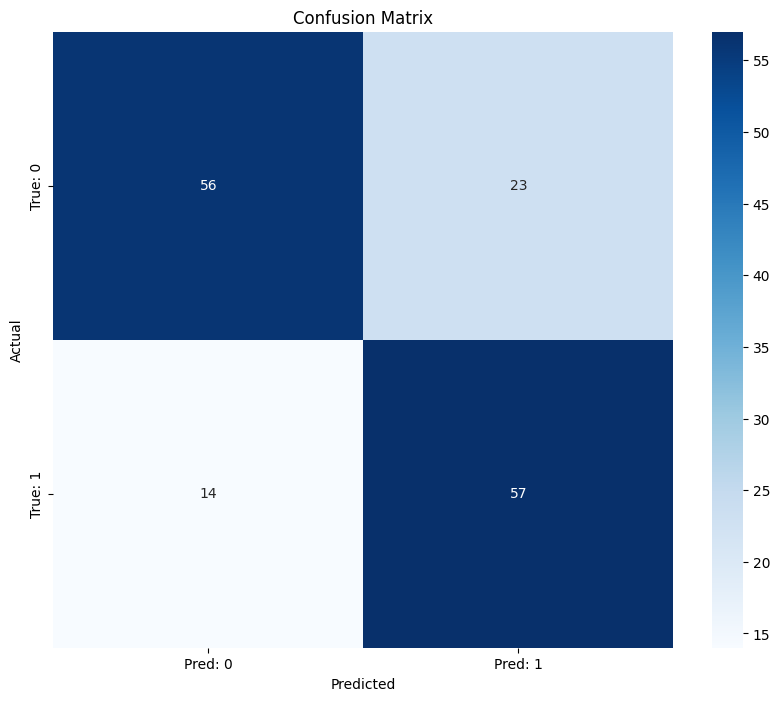

In [87]:
#11 Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
x, y = make_classification(n_samples=500, n_features=10, n_informative=5, n_redundant=5, n_classes=2, random_state=1)

# Split into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#model training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred: 0", "Pred: 1"], yticklabels=["True: 0", "True: 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [88]:
#12 Write a Python program to train a Logistic Regression model and evaluate its performance using Precision, Recall, and F1-Score.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=2, random_state=1)

# Split into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#model training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision Score:", precision_score(y_test,y_pred))
print("Recall Score:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))



Precision Score: 0.9043478260869565
Recall Score: 0.7761194029850746
F1 Score: 0.8353413654618473


In [5]:
#13 Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
x , y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=2,weights=[0.9,0.1] ,random_state=1)


# Split into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)


from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
model.fit(x_train,y_train)

y_pred = model.predict(x_test)


from sklearn.metrics import accuracy_score,  confusion_matrix, classification_report
print("Accuracy Score :" , accuracy_score(y_test,y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy Score : 0.828
Confusion Matrix:
 [[186  38]
 [  5  21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.83      0.90       224
           1       0.36      0.81      0.49        26

    accuracy                           0.83       250
   macro avg       0.66      0.82      0.70       250
weighted avg       0.91      0.83      0.85       250



In [36]:
#14 Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('titanic.csv')    # loading titanic dataset
df.isna().sum()      #checking for missing value

df['Age'] = df['Age'].fillna(df['Age'].median()) #imputating missing value in age column
df = df.dropna(subset=['Cabin', 'Embarked'])   #droping null values from cabin
df.isna().sum() # again checking for null value (none found)

# Convert categorical column 'Sex' to numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

x = df[['Pclass', 'Age', 'Sex']]
y = df['Survived']

# Split into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)


from sklearn.metrics import accuracy_score,  confusion_matrix, classification_report
print("Accuracy Score :" , accuracy_score(y_test,y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy Score : 0.7049180327868853
Confusion Matrix:
 [[12 13]
 [ 5 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.48      0.57        25
           1       0.70      0.86      0.78        36

    accuracy                           0.70        61
   macro avg       0.71      0.67      0.67        61
weighted avg       0.71      0.70      0.69        61



In [43]:
#15 Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
x , y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=2,random_state=1)


# Split into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)



# --- Model without scaling ---
# Train Logistic Regression without scaling
model_without_scaling = LogisticRegression(max_iter=1000)
model_without_scaling.fit(x_train, y_train)

# Predict and evaluate accuracy without scaling
y_pred_without_scaling = model_without_scaling.predict(x_test)
accuracy_without_scaling = accuracy_score(y_test, y_pred_without_scaling)
print("Accuracy Score (without scaling):", accuracy_without_scaling)

from sklearn.preprocessing import StandardScaler

# --- Apply Standardization (scaling) ---
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train Logistic Regression with scaled data
model_with_scaling = LogisticRegression(max_iter=1000)
model_with_scaling.fit(x_train_scaled, y_train)

# Predict and evaluate accuracy with scaling
y_pred_with_scaling = model_with_scaling.predict(x_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)
print("Accuracy Score (with scaling):", accuracy_with_scaling)



# Comparison of results
print("\nComparison of results:")
print(f"Accuracy without scaling: {accuracy_without_scaling:.4f}")
print(f"Accuracy with scaling: {accuracy_with_scaling:.4f}")


improvement = (accuracy_with_scaling - accuracy_without_scaling) / accuracy_without_scaling * 100
print(f"Accuracy Improvement: {improvement:.2f}%")



Accuracy Score (without scaling): 0.8433333333333334
Accuracy Score (with scaling): 0.8433333333333334

Comparison of results:
Accuracy without scaling: 0.8433
Accuracy with scaling: 0.8433
Accuracy Improvement: 0.00%


In [51]:
#16 Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
x , y = make_classification(n_samples=1000, n_features=18, n_informative=9, n_redundant=9, n_classes=2,random_state=1)


# Split into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

y_pred_prob = model.predict_proba(x_test)[:,-1]


from sklearn.metrics import roc_auc_score
print('ROC-AUC score: ',roc_auc_score(y_test, y_pred_prob))

ROC-AUC score:  0.953558202382144


In [3]:
#17 Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
x, y = make_classification(n_samples=1000, n_features=12, n_informative=6, n_redundant=6, n_classes=2, random_state=1)

# Split into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=0.5)
clf.fit(x_train,y_train)

ypred = clf.predict(x_test)

from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(y_test, ypred))

Accuracy score:  0.865


In [6]:
#18 Write a Python program to train Logistic Regression and identify important features based on model coefficients.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
x, y = make_classification(n_samples=1000, n_features=12, n_informative=6, n_redundant=6, n_classes=5, random_state=1)

# Split into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(x_train, y_train)


coefficients = model.coef_   # Get the coefficients for each class


# Create a DataFrame to view the feature importance for each class
feature_importance = pd.DataFrame(coefficients, columns=[f'Feature {i}' for i in range(x_train.shape[1])])

# Calculate the absolute values of the coefficients for each class to determine importance
importance_df = feature_importance.abs()

# Plot the importance of each feature across all classes (by averaging the absolute values of the coefficients)
feature_importance_mean = importance_df.mean(axis=0)

# Sort features by their importance (mean of absolute coefficients)
sorted_features = feature_importance_mean.sort_values(ascending=False)

# Display the sorted feature importance
print("Feature Importance Based on Coefficients:")
print(sorted_features)



Feature Importance Based on Coefficients:
Feature 7     0.735865
Feature 2     0.458036
Feature 10    0.372276
Feature 0     0.332117
Feature 11    0.315071
Feature 4     0.301231
Feature 1     0.290811
Feature 6     0.257448
Feature 8     0.167143
Feature 3     0.130488
Feature 5     0.094780
Feature 9     0.054276
dtype: float64


In [8]:
#19 Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score.



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
x, y = make_classification(n_samples=1000, n_features=18, n_informative=9, n_redundant=9, n_classes=2, random_state=1)

# Split into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

yprid = model.predict(x_test)


# Calculate Cohen’s Kappa Score
from sklearn.metrics import cohen_kappa_score
print(f"Cohen’s Kappa Score: {cohen_kappa_score(y_test,yprid)}")


Cohen’s Kappa Score: 0.7862391449565798


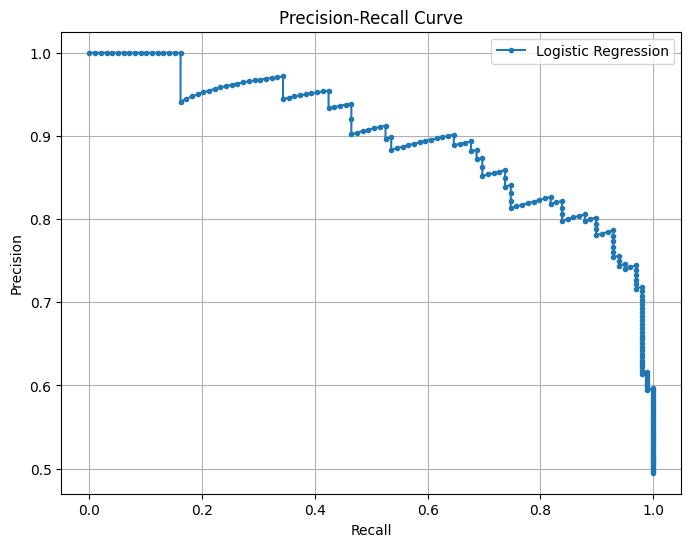

In [11]:
#20 Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
x, y = make_classification(n_samples=1000, n_features=14, n_informative=7, n_redundant=7, n_classes=2, random_state=1)

# Split into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

# Get predicted probabilities for the positive class
y_pred_proba = model.predict_proba(x_test)[:, 1]

# Compute Precision-Recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
#21 Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
x, y = make_classification(n_samples=1000, n_features=14, n_informative=7, n_redundant=7, n_classes=2, random_state=1)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


solvers = ['liblinear', 'saga', 'lbfgs']

for solver in solvers:
  from sklearn.linear_model import LogisticRegression
  clf = LogisticRegression(solver=solver, max_iter=500)
  clf.fit(x_train,y_train)

   # Get predicted probabilities for the positive class (class 1)
  y_pred = clf.predict(x_test)

  # Calculate accuracy
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Solver: {solver}, Accuracy: {accuracy}")



Solver: liblinear, Accuracy: 0.844
Solver: saga, Accuracy: 0.844
Solver: lbfgs, Accuracy: 0.844


In [22]:
#22 Write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC).

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#loading dataset
from sklearn.datasets import load_iris
data = load_iris()

df = pd.DataFrame(data.data, columns= data.feature_names)
df['target'] = data.target

#For binary classification we only need two features  (0 and 1)

df = df[df['target'] != 2]

x = df.iloc[:,:-1]
y = df.iloc[:,-1]


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train,y_train)

y_p = clf.predict(x_test)

from sklearn.metrics import matthews_corrcoef
MCC = matthews_corrcoef(y_test, y_p)
print(f"Matthews Correlation Coefficient (MCC): {MCC}")

Matthews Correlation Coefficient (MCC): 1.0


In [28]:
#23 Write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling



import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#loading dataset
from sklearn.datasets import load_iris
data = load_iris()

df = pd.DataFrame(data.data, columns= data.feature_names)
df['target'] = data.target

#For binary classification we only need two features  (0 and 1)

df = df[df['target'] != 2]

x = df.iloc[:,:-1]
y = df.iloc[:,-1]


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

# Train Logistic Regression model without scaling
from sklearn.linear_model import LogisticRegression

clf_without_scaling = LogisticRegression()
clf_without_scaling.fit(x_train, y_train)

# Predict and evaluate accuracy without scaling
y_pred_without_scaling = clf_without_scaling.predict(x_test)
accuracy_without_scaling = accuracy_score(y_test, y_pred_without_scaling)

from sklearn.metrics import accuracy_score
print(f"Accuracy Score Without Scaling: {accuracy_without_scaling:.4f}")

# Apply Standardization (scaling)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train Logistic Regression model with scaling
clf_with_scaling = LogisticRegression()
clf_with_scaling.fit(x_train_scaled, y_train)

# Predict and evaluate accuracy with scaling
y_pred_with_scaling = clf_with_scaling.predict(x_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)

from sklearn.metrics import accuracy_score
print(f"Accuracy Score With Scaling: {accuracy_with_scaling:.4f}")




Accuracy Score Without Scaling: 1.0000
Accuracy Score With Scaling: 1.0000


In [38]:
#24 Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#loading dataset
from sklearn.datasets import load_iris
data = load_iris()

df = pd.DataFrame(data.data, columns= data.feature_names)
df['target'] = data.target

#For binary classification we only need two features  (0 and 1)

df = df[df['target'] != 2]

x = df.iloc[:,:-1]
y = df.iloc[:,-1]


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.model_selection import GridSearchCV

# Define the parameter grid for C (regularization strength)
param = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear')# Using 'liblinear' solver for binary classification

clf = GridSearchCV(classifier, param_grid=param, cv=5, scoring='accuracy')
clf.fit(x_train,y_train)


print("The best parameter (C) found: ", clf.best_params_)

# Evaluate the model with the best 'C' on the test set
best_model = clf.best_estimator_
y_pred = best_model.predict(x_test)

# Calculate accuracy on the test set
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy with the best 'C': {test_accuracy:.4f}")

The best parameter (C) found:  {'C': 0.001}
Test set accuracy with the best 'C': 1.0000


In [42]:
#25 Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_classification
x , y = make_classification(n_samples=10000, n_features=10, n_informative=5, n_redundant=5, n_classes= 2, random_state=1)


from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y , test_size= 0.30, random_state=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

# Model training
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(xtrain,ytrain)

import joblib

joblib.dump(log, 'logistic_regression_model.joblib')
print('Model save to logistic_regression_model.joblib')

load_model = joblib.load('logistic_regression_model.joblib')
print('Model is loaded')

predictions = load_model.predict(xtest)
print("Predictions on the test set:", predictions)


Model save to logistic_regression_model.joblib
Model is loaded
Predictions on the test set: [0 0 1 ... 0 1 0]
